# Example 1

In [1]:
from CircuitCalculator.SimpleCircuit.Elements import Schematic, Resistor, Line, Ground, CurrentSource, RealCurrentSource
from CircuitCalculator.SimpleCircuit.DiagramSolution import dc_solution
from CircuitCalculator.Network.NodalAnalysis import nodal_analysis_solver

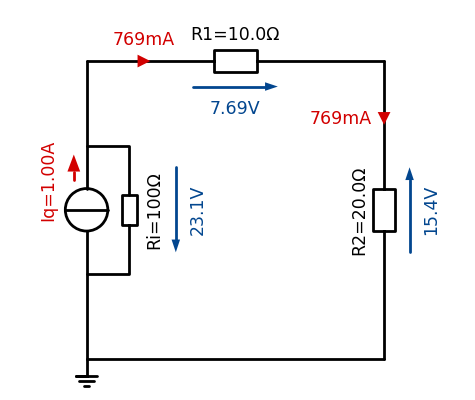

In [3]:
with Schematic() as schematic:
    schematic += (I:=RealCurrentSource(
        current_source=CurrentSource(I=1, R=100, name='Iq'),
        resistor=Resistor(R=100, name='Ri'),
        zoom_resistor=0.7).up())
    schematic += (R1:=Resistor(R=10, name='R1')).right()
    schematic += Resistor(R=20, name='R2').down()
    schematic += Line().left()
    schematic += Ground()
    schemdraw_solution = dc_solution(schematic=schematic, solver=nodal_analysis_solver)
    schematic += schemdraw_solution.draw_voltage('R1')
    schematic += schemdraw_solution.draw_current('R1')
    schematic += schemdraw_solution.draw_voltage('R2', reverse=True)
    schematic += schemdraw_solution.draw_current('R2')
    schematic += schemdraw_solution.draw_voltage('Iq', reverse=True)